--- Model Trained by Ali Yasser ---
Theta_0 (Intercept): 0.0408
Theta_1 (Slope): 2.9994
Predicted price for 70m²: 210.00k$


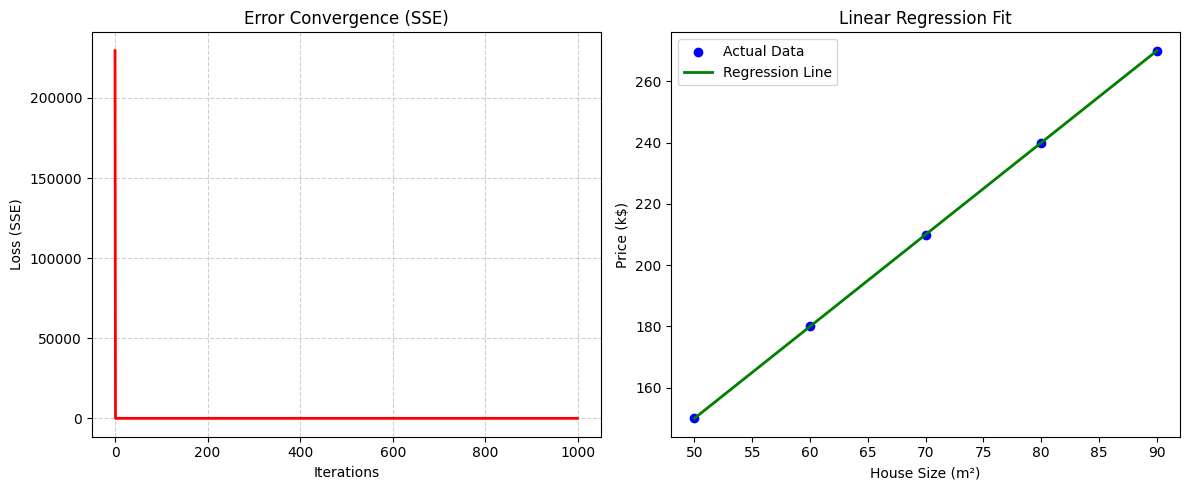

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression_Ali_Yasser:
    """
    A Linear Regression model trained using Gradient Descent.
    
    This class supports single and multiple linear regression, provides 
    visualization of the learning process, and calculates error metrics.
    
    Attributes:
        lr (float): Learning rate for gradient descent.
        n_iters (int): Number of iterations for the training process.
        weights (np.array): Coefficients for the features (theta_1, ..., theta_n).
        bias (float): The intercept term (theta_0).
        sse_history (list): Record of Sum of Squared Errors for each iteration.
    """

    def __init__(self, learning_rate=0.001, n_iters=100):
        """
        Initializes the model with hyperparameters.
        
        Args:
            learning_rate (float): Step size for weight updates.
            n_iters (int): Maximum number of passes over the dataset.
        """
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.sse_history = []

    def fit(self, X, y):
        """
        Trains the model using the Gradient Descent algorithm.
        
        Args:
            X (np.array): Training data (independent variables).
            y (np.array): Target values (dependent variables).
        """
        # Ensure X is a 2D array for consistent matrix multiplication
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        n_samples, n_features = X.shape

        # 1. Parameter Initialization (Starting with zeros)
        self.weights = np.zeros(n_features)
        self.bias = 0

        # 2. Optimization Loop
        for _ in range(self.n_iters):
            # Linear Equation: y_hat = X * w + b
            y_predicted = np.dot(X, self.weights) + self.bias

            # Calculate Loss (SSE - Sum of Squared Errors)
            sse = np.sum((y - y_predicted) ** 2)
            self.sse_history.append(sse)

            # Compute Gradients (Partial Derivatives)
            # [Image of Gradient Descent partial derivatives for linear regression]
            dw = (2 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (2 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias (Moving against the gradient)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        """
        Predicts target values for given input samples.
        
        Args:
            X (np.array): Input data for prediction.
            
        Returns:
            np.array: Predicted values based on the learned parameters.
        """
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return np.dot(X, self.weights) + self.bias

    def calculate_mse(self, X, y):
        """
        Calculates the Mean Squared Error (MSE).
        
        Args:
            X (np.array): Input data.
            y (np.array): True target values.
            
        Returns:
            float: The average of the squares of the errors.
        """
        y_pred = self.predict(X)
        return np.mean((y - y_pred) ** 2)

    def plot_training(self, X, y):
        """
        Visualizes the convergence of the model and the final fit.
        """
        plt.figure(figsize=(12, 5))

        # Plot 1: SSE Convergence
        plt.subplot(1, 2, 1)
        plt.plot(range(len(self.sse_history)), self.sse_history, color='red', linewidth=2)
        plt.title('Error Convergence (SSE)')
        plt.xlabel('Iterations')
        plt.ylabel('Loss (SSE)')
        plt.grid(True, linestyle='--', alpha=0.6)

        # Plot 2: Final Regression Line
        plt.subplot(1, 2, 2)
        plt.scatter(X, y, color='blue', label='Actual Data')
        plt.plot(X, self.predict(X), color='green', label='Regression Line', linewidth=2)
        plt.title('Linear Regression Fit')
        plt.xlabel('House Size (m²)')
        plt.ylabel('Price (k$)')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

# --- Example Usage for Ali Yasser's Task ---

if __name__ == "__main__":
    # Dataset representing House Size (X) and Price (y)
    X_train = np.array([50, 60, 70, 80, 90])
    y_train = np.array([150, 180, 210, 240, 270])

    # Initialize the model (Adjusting parameters for perfect convergence)
    model = LinearRegression_Ali_Yasser(learning_rate=0.0001, n_iters=1000)
    
    # Train the model
    model.fit(X_train, y_train)

    # Output Results
    print(f"--- Model Trained by Ali Yasser ---")
    print(f"Theta_0 (Intercept): {model.bias:.4f}")
    print(f"Theta_1 (Slope): {model.weights[0]:.4f}")
    
    # Prediction for a 70m² house
    target_size = 70
    prediction = model.predict(np.array([target_size]))
    print(f"Predicted price for {target_size}m²: {prediction[0]:.2f}k$")
    
    # Show Visuals
    model.plot_training(X_train, y_train)